In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
h1_data = pd.read_csv('H1.csv')
# h2_data = pd.read_csv('H2.csv')

In [6]:
h1_data['IsCanceled'].value_counts()

0    28938
1    11122
Name: IsCanceled, dtype: int64

In [11]:
cols = [ 'LeadTime','StaysInWeekendNights','StaysInWeekNights', 'ArrivalDateWeekNumber', 'PreviousCancellations', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'MarketSegment','DepositType','CustomerType','IsCanceled']
data = h1_data[cols]

In [12]:
data

,LeadTime,StaysInWeekendNights,StaysInWeekNights,ArrivalDateWeekNumber,PreviousCancellations,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,MarketSegment,DepositType,CustomerType,IsCanceled
0,342,0,0,27,0,3,0,0.00,0,0,Direct,No Deposit,Transient,0
1,737,0,0,27,0,4,0,0.00,0,0,Direct,No Deposit,Transient,0
2,7,0,1,27,0,0,0,75.00,0,0,Direct,No Deposit,Transient,0
3,13,0,1,27,0,0,0,75.00,0,0,Corporate,No Deposit,Transient,0
4,14,0,2,27,0,0,0,98.00,0,1,Online TA,No Deposit,Transient,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,212,2,8,35,0,1,0,89.75,0,0,Offline TA/TO,No Deposit,Transient,0
40056,169,2,9,35,0,0,0,202.27,0,1,Direct,No Deposit,Transient-Party,0
40057,204,4,10,35,0,0,0,153.57,0,3,Direct,No Deposit,Transient,0
40058,211,4,10,35,0,0,0,112.80,0,1,Offline TA/TO,No Deposit,Contract,0


In [14]:
data['duration'] = data.apply(lambda x: x['StaysInWeekendNights'] + x['StaysInWeekNights'], axis=1)

C:\Users\sid31\AppData\Local\Temp\ipykernel_4152\3286828082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'] = data.apply(lambda x: x['StaysInWeekendNights'] + x['StaysInWeekNights'], axis=1)


In [18]:
data.drop(['StaysInWeekendNights','StaysInWeekNights'], inplace=True, axis=1)

C:\Users\sid31\AppData\Local\Temp\ipykernel_4152\130907027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['StaysInWeekendNights','StaysInWeekNights'], inplace=True, axis=1)


In [19]:
data

,LeadTime,ArrivalDateWeekNumber,PreviousCancellations,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,MarketSegment,DepositType,CustomerType,IsCanceled,duration
0,342,27,0,3,0,0.00,0,0,Direct,No Deposit,Transient,0,0
1,737,27,0,4,0,0.00,0,0,Direct,No Deposit,Transient,0,0
2,7,27,0,0,0,75.00,0,0,Direct,No Deposit,Transient,0,1
3,13,27,0,0,0,75.00,0,0,Corporate,No Deposit,Transient,0,1
4,14,27,0,0,0,98.00,0,1,Online TA,No Deposit,Transient,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,212,35,0,1,0,89.75,0,0,Offline TA/TO,No Deposit,Transient,0,10
40056,169,35,0,0,0,202.27,0,1,Direct,No Deposit,Transient-Party,0,11
40057,204,35,0,0,0,153.57,0,3,Direct,No Deposit,Transient,0,14
40058,211,35,0,0,0,112.80,0,1,Offline TA/TO,No Deposit,Contract,0,14


In [21]:
data[data.duplicated(keep='first')]

,LeadTime,ArrivalDateWeekNumber,PreviousCancellations,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,MarketSegment,DepositType,CustomerType,IsCanceled,duration
5,14,27,0,0,0,98.00,0,1,Online TA,No Deposit,Transient,0,2
15,68,27,0,0,0,97.00,0,3,Online TA,No Deposit,Transient,0,4
22,72,27,0,1,0,84.67,0,1,Direct,No Deposit,Transient,0,6
43,70,27,0,0,0,137.00,0,1,Direct,No Deposit,Transient,0,5
59,14,27,0,0,0,98.00,0,1,Online TA,No Deposit,Transient,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39965,202,35,0,0,0,118.75,0,1,Online TA,No Deposit,Transient,0,7
39981,97,35,0,0,0,118.50,0,1,Offline TA/TO,No Deposit,Contract,0,7
39993,153,35,0,0,0,230.43,0,3,Direct,No Deposit,Transient,0,7
40035,21,35,0,0,0,101.70,0,2,Offline TA/TO,No Deposit,Contract,0,7


In [37]:
data['CustomerType'].value_counts()

Transient          30209
Transient-Party     7791
Contract            1776
Group                284
Name: CustomerType, dtype: int64

## EDA

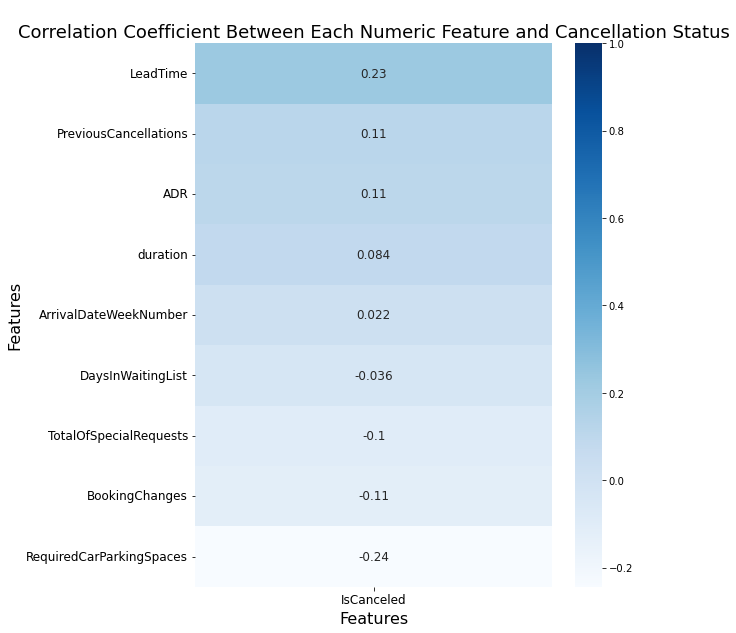

In [57]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data_num.corr()[['IsCanceled']].sort_values('IsCanceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [ ]:
fig, ax1 = plt.subplots(figsize = (20, 8))
ax2 = ax1.twinx()

ax1.bar(step, month_year_cancellation[1], color = '#ff6961', alpha = 0.7)
ax1.set_xlabel('Month Year')
ax1.set_ylabel('Percentage of Cancellation')
ax2.plot(month_year_adr.index, month_year_adr['Median Price'], color = '#008000')
ax1.set_xticks(step)
ax1.set_xticklabels(month_year_cancellation.index, Rotation = 90)

plt.show()


C:\Users\sid31\AppData\Local\Temp\ipykernel_4152\2706569791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_bin'] = pd.cut(data['ADR'], bins=bins, include_lowest=True, right=False)


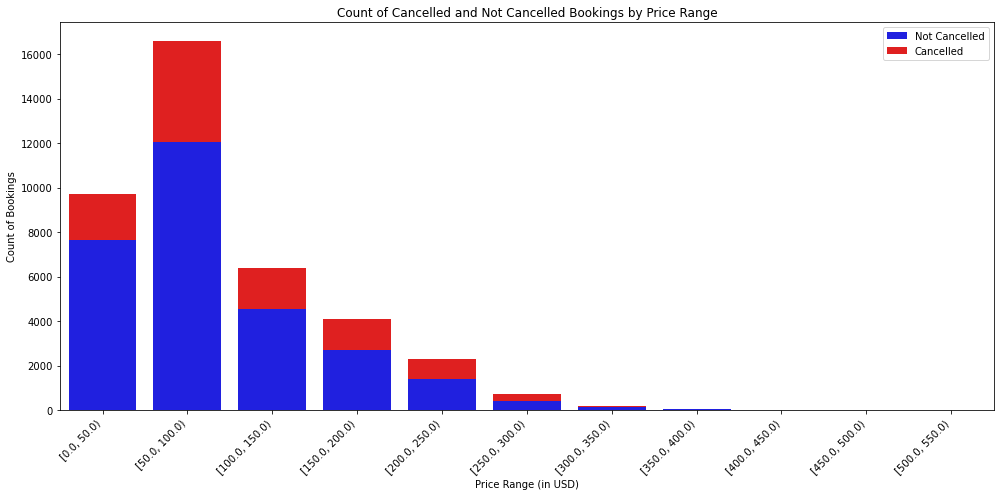

In [59]:
bins = np.arange(0, data['ADR'].max() + 50, 50)

# Bin the per_Day_price data
data['price_bin'] = pd.cut(data['ADR'], bins=bins, include_lowest=True, right=False)

# Aggregate the counts
price_bin_counts = data.groupby(['price_bin', 'IsCanceled']).size().unstack(fill_value=0)
price_bin_counts.columns = ['Not_Cancelled', 'Cancelled']
price_bin_counts = price_bin_counts.reset_index()

plt.figure(figsize=(14, 7))

# Plotting
# Plot "Not Cancelled" counts
sns.barplot(x='price_bin', y='Not_Cancelled', data=price_bin_counts, color='blue', label='Not Cancelled')

# Add "Cancelled" counts on top
sns.barplot(x='price_bin', y='Cancelled', data=price_bin_counts, color='red', label='Cancelled', bottom=price_bin_counts['Not_Cancelled'])

# Improve legibility
plt.xticks(rotation=45, ha='right')
plt.xlabel('Price Range (in USD)')
plt.ylabel('Count of Bookings')
plt.title('Count of Cancelled and Not Cancelled Bookings by Price Range')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

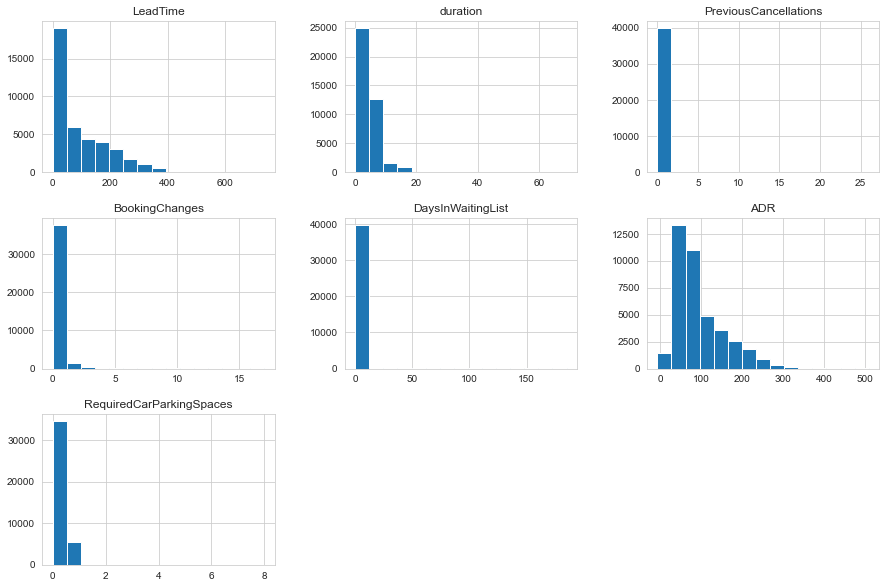

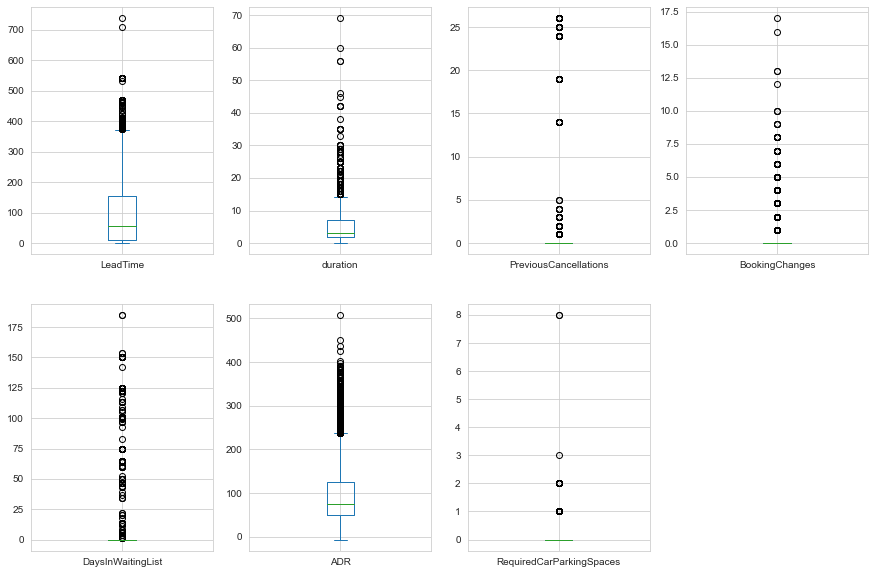

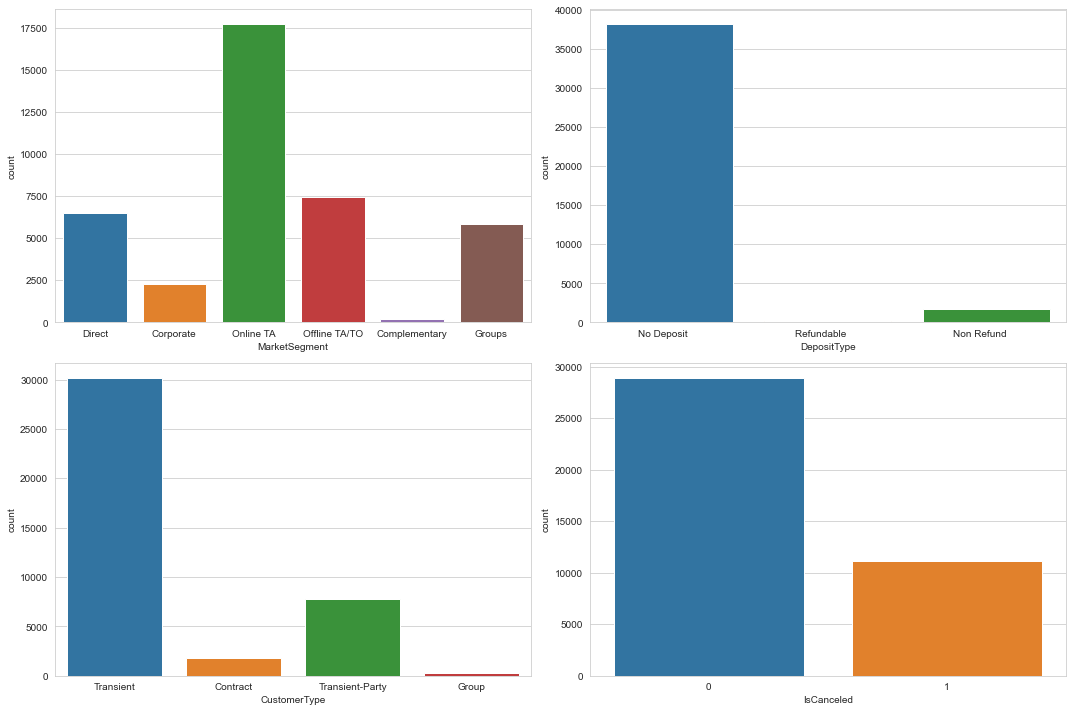

In [70]:
cols = [ 'LeadTime','StaysInWeekendNights','StaysInWeekNights', 'ArrivalDateWeekNumber', 'PreviousCancellations', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'MarketSegment','DepositType','CustomerType','IsCanceled']

sns.set_style("whitegrid")

# Histograms for numerical features
data[['LeadTime', 'duration','PreviousCancellations', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces']].hist(bins=15, figsize=(15, 10))
plt.show()

# Boxplots for numerical features
data[['LeadTime','duration', 'PreviousCancellations', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces']].plot(kind='box', subplots=True, layout=(2,4), figsize=(15, 10))
plt.show()

# Countplots for categorical features
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='MarketSegment', data=data, ax=ax[0, 0])
sns.countplot(x='DepositType', data=data, ax=ax[0, 1])
sns.countplot(x='CustomerType', data=data, ax=ax[1, 0])
sns.countplot(x='IsCanceled', data=data, ax=ax[1, 1])
plt.tight_layout()
plt.show()

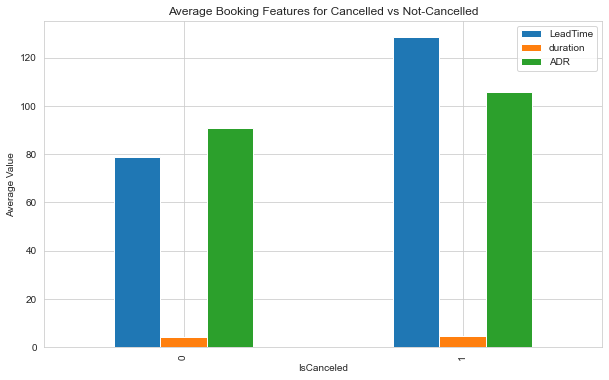

In [71]:
grouped = data.groupby('IsCanceled')[['LeadTime','duration', 'ADR']].mean()
grouped.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Value')
plt.title('Average Booking Features for Cancelled vs Not-Cancelled')
plt.show()

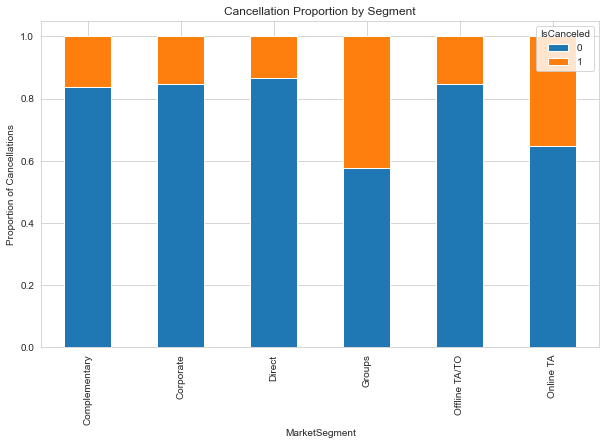

In [63]:
# Bivariate analysis for 'segment' and 'is_cancelled'
segment_cancellation_rate = pd.crosstab(data['MarketSegment'], data['IsCanceled'], normalize='index')
segment_cancellation_rate.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cancellation Proportion by Segment')
plt.ylabel('Proportion of Cancellations')
plt.show()

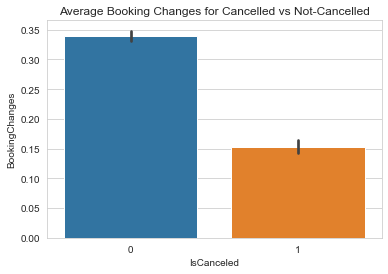

In [64]:
sns.barplot(x='IsCanceled', y='BookingChanges', data=data)
plt.title('Average Booking Changes for Cancelled vs Not-Cancelled')
plt.show()

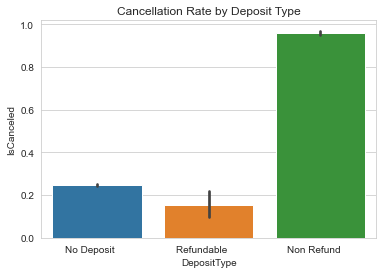

In [65]:
sns.barplot(x='DepositType', y='IsCanceled', data=data)
plt.title('Cancellation Rate by Deposit Type')
plt.show()

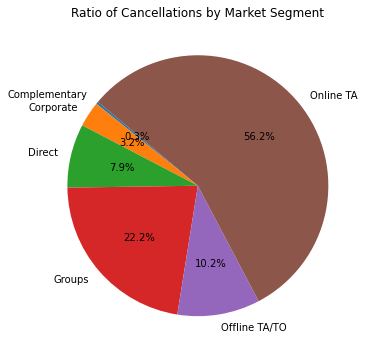

In [55]:
total_ones = data['IsCanceled'].sum()
result = data.groupby('MarketSegment')['IsCanceled'].agg(
    ratio_of_ones = lambda x: (x.sum() / total_ones)*100
)
pie_values = result['ratio_of_ones'].values

# Plotting the corrected pie chart
plt.figure(figsize=(8, 6))
plt.pie(pie_values, labels=result.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Cancellations by Market Segment')
plt.show()

## feature engineering

In [67]:
num_cols = [ 'LeadTime','duration', 'ArrivalDateWeekNumber', 'PreviousCancellations', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'IsCanceled']
data_num = data[num_cols]
data_num['ReliabilityRatio'] = ((data_num['BookingChanges'] + 1) - 1.5 * (data_num['PreviousCancellations'] + 1)) / (data_num['DaysInWaitingList'] + 1)


C:\Users\sid31\AppData\Local\Temp\ipykernel_4152\398661136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['ReliabilityRatio'] = ((data_num['BookingChanges'] + 1) - 1.5 * (data_num['PreviousCancellations'] + 1)) / (data_num['DaysInWaitingList'] + 1)


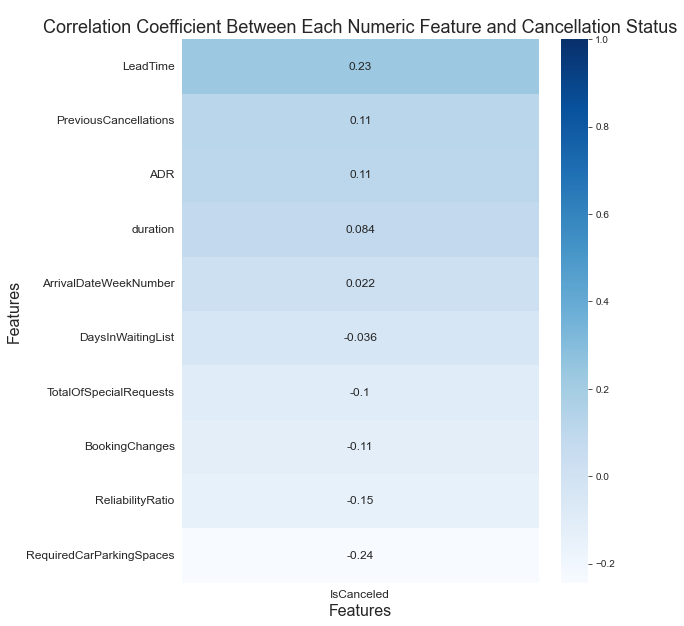

In [68]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data_num.corr()[['IsCanceled']].sort_values('IsCanceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [73]:
dropped_df = data.drop(['PreviousCancellations', 'price_bin'], axis=1)

In [107]:
dropped_df.isna().sum()

LeadTime                    0
ArrivalDateWeekNumber       0
BookingChanges              0
DaysInWaitingList           0
ADR                         0
RequiredCarParkingSpaces    0
TotalOfSpecialRequests      0
MarketSegment               0
DepositType                 0
CustomerType                0
IsCanceled                  0
duration                    0
calcellationsPerSegment     0
ReliabilityRatio            0
dtype: int64

## Train test split

In [108]:
from sklearn.model_selection import train_test_split
X = dropped_df.drop('IsCanceled', axis=1)  # Replace 'target' with the name of your actual target column
y = dropped_df['IsCanceled']  # This is the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [109]:
X_train

,LeadTime,ArrivalDateWeekNumber,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,MarketSegment,DepositType,CustomerType,duration,calcellationsPerSegment,ReliabilityRatio
25779,180,28,1,0,85.00,0,0,Direct,No Deposit,Transient,8,0.134807,0.5
18479,0,47,0,0,42.00,0,0,Corporate,No Deposit,Transient-Party,4,0.152014,-0.5
37826,282,25,0,0,112.80,0,1,Offline TA/TO,No Deposit,Transient,7,0.152302,-0.5
30799,80,49,0,0,51.80,0,1,Groups,No Deposit,Transient-Party,2,0.423920,-0.5
16355,226,39,0,0,55.80,0,0,Offline TA/TO,No Deposit,Transient,1,0.152302,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,134,23,0,0,46.75,0,0,Offline TA/TO,No Deposit,Contract,7,0.152302,-0.5
11284,221,18,0,0,82.00,0,0,Groups,No Deposit,Transient-Party,7,0.423920,-0.5
38158,204,26,1,0,185.50,0,2,Online TA,No Deposit,Transient,10,0.352417,0.5
860,130,31,0,0,120.60,0,2,Online TA,No Deposit,Transient,7,0.352417,-0.5


## One-hot encoding

In [110]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' is your DataFrame and it has categorical columns named 'segment', 'deposit', 'cust_type'

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Select the columns to encode
categorical_cols = ['MarketSegment','DepositType','CustomerType']

# Perform one-hot encoding
encoded_columns = encoder.fit_transform(X_train[categorical_cols])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_cols))

encoded_df.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
# Concatenate the original DataFrame with the encoded DataFrame
X_train = pd.concat([X_train, encoded_df], axis=1)

# Drop the original categorical columns as they are now redundant
X_train = X_train.drop(categorical_cols, axis=1)
X_train

,LeadTime,ArrivalDateWeekNumber,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,duration,calcellationsPerSegment,ReliabilityRatio,...,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,180,28,1,0,85.00,0,0,8,0.134807,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,47,0,0,42.00,0,0,4,0.152014,-0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,282,25,0,0,112.80,0,1,7,0.152302,-0.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,80,49,0,0,51.80,0,1,2,0.423920,-0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,226,39,0,0,55.80,0,0,1,0.152302,-2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,134,23,0,0,46.75,0,0,7,0.152302,-0.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
28038,221,18,0,0,82.00,0,0,7,0.423920,-0.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
28039,204,26,1,0,185.50,0,2,10,0.352417,0.5,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28040,130,31,0,0,120.60,0,2,7,0.352417,-0.5,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
X_train.columns

Index(['LeadTime', 'ArrivalDateWeekNumber', 'BookingChanges',
       'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'duration', 'calcellationsPerSegment',
       'ReliabilityRatio', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DepositType_No Deposit     ',
       'DepositType_Non Refund     ', 'DepositType_Refundable     ',
       'CustomerType_Contract', 'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party'],
      dtype='object')

In [112]:

# Select the same categorical columns from the test set for encoding
categorical_cols_test = X_test[categorical_cols]

# Perform one-hot encoding on test set categorical columns
encoded_columns_test = encoder.transform(categorical_cols_test)

# Create a DataFrame with the encoded columns for the test set
encoded_df_test = pd.DataFrame(encoded_columns_test, columns=encoder.get_feature_names_out(categorical_cols))

encoded_df_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Concatenate the original test DataFrame with the encoded DataFrame
X_test = pd.concat([X_test, encoded_df_test], axis=1)

# Drop the original categorical columns from the test set, as they are now redundant
X_test = X_test.drop(categorical_cols, axis=1)
X_test

,LeadTime,ArrivalDateWeekNumber,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,duration,calcellationsPerSegment,ReliabilityRatio,...,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,167,26,0,0,82.00,1,0,6,0.352417,-0.500000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,322,26,1,75,92.00,0,0,3,0.423920,0.006579,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,128,22,0,0,115.00,0,1,3,0.352417,-0.500000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,125,53,0,0,56.88,0,0,7,0.352417,-0.500000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,38,0,0,165.50,0,0,3,0.134807,-0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12013,78,47,0,0,32.00,0,0,1,0.152014,-0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12014,79,34,0,0,120.00,0,0,7,0.152302,-0.500000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12015,41,11,1,0,66.00,0,0,7,0.152302,0.500000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12016,312,29,0,0,192.00,0,3,7,0.352417,-0.500000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelling

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


### logistic regression

In [114]:
# Logistic Regression
logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

logistic_grid_search = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring='accuracy', verbose=1)
logistic_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best cross-validation score:", logistic_grid_search.best_score_)

# # Evaluate on the test set
# logistic_test_score = accuracy_score(y_test, logistic_grid_search.predict(X_test))
# print("Test set accuracy with Logistic Regression:", logistic_test_score)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters for Logistic Regression: {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8089649773176337


### Random forest

In [116]:
# Random Forest
random_forest_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_forest_grid_search = GridSearchCV(RandomForestClassifier(), random_forest_params, cv=5, scoring='accuracy', verbose=1)
random_forest_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", random_forest_grid_search.best_params_)
print("Best cross-validation score:", random_forest_grid_search.best_score_)

# # Evaluate on the test set
# random_forest_test_score = accuracy_score(y_test, random_forest_grid_search.predict(X_test))
# print("Test set accuracy with Random Forest:", random_forest_test_score)

# # Feature Importance
# feature_importances_rf = pd.DataFrame(random_forest_grid_search.best_estimator_.feature_importances_, 
#                                       index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
# print(feature_importances_rf)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8530418493917331


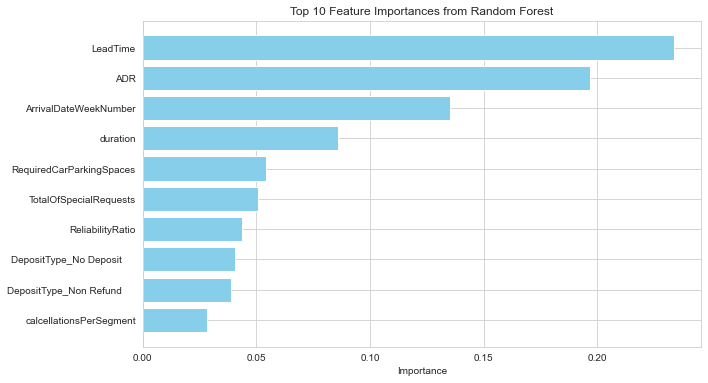

In [120]:
best_rf_model = random_forest_grid_search.best_estimator_

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Convert the importances into a DataFrame for easier handling
features_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='importance', ascending=False)

# Optionally, plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['feature'][:10], features_df['importance'][:10], color='skyblue')  # top 10 features
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

### XGBoost

In [118]:
# XGBoost

xgboost_params = {
    'max_depth': [7, 10, 15],              # Maximum depth of each tree
    'n_estimators': [200, 250, 300],          # Number of trees
    'learning_rate': [0.1, 0.2],        # Step size shrinkage used to prevent overfitting
    'subsample': [0.4, 0.6],        # Subsample ratio of the training instances
    'min_child_weight': [0.5, 1]       # Minimum sum of instance weight needed in a child
}

xgboost_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params, cv=5, scoring='accuracy', verbose=1)
xgboost_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", xgboost_grid_search.best_params_)
print("Best cross-validation score:", xgboost_grid_search.best_score_)

# # Evaluate on the test set
# xgboost_test_score = accuracy_score(y_test, xgboost_grid_search.predict(X_test))
# print("Test set accuracy with XGBoost:", xgboost_test_score)

# # Feature Importance
# feature_importances_xgb = pd.DataFrame(xgboost_grid_search.best_estimator_.feature_importances_, 
#                                        index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
# print(feature_importances_xgb)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.6}
Best cross-validation score: 0.8461236958942845
